# Translation Token and Cost Analysis Notebook

This notebook performs the following tasks:
- **Import and Setup:** Loads necessary libraries for data manipulation, plotting, and tokenization.
- **Data Loading:** Reads a CSV file containing translations for multiple languages.
- **Token Calculation:** Uses the `tiktoken` library (with model `"gpt-4o"`) to compute the number of tokens in each translation.
- **Unigram Calculation:** Computes the average number of unigrams (words) per language.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tiktoken

## Load Translation Data

In this cell, we load the translation data from a CSV file.
We then check for missing values to ensure data quality.

In [2]:
data = pd.read_csv("../data/educhat-translation/all_translations.csv")
data.isna().sum()

english       0
arabic        0
bengali       0
burmese       0
cantonese     0
hindi         0
indonesian    0
japanese      0
khmer         0
korean        0
mandarin      0
mongolian     0
nepali        0
persian       0
portuguese    0
punjabi       0
spanish       0
swahili       1
tagalog       0
thai          0
turkish       0
urdu          0
vietnamese    0
dtype: int64

## Tokenization Setup

Here, we set up the tokenizer for the model `"gpt-4o"` using the `tiktoken` library.

In [3]:
# Set up the encoding for the given model.
encoding = tiktoken.encoding_for_model("gpt-4o")

In [ ]:
def num_tokens_from_string(string: str, model_name: str) -> int:

    encoding = tiktoken.encoding_for_model(model_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


num_tokens_from_string(
    "Given an English text, translate it to the target language: Bengali", "gpt-4o"
)

In [5]:
tokens = pd.DataFrame()
cost = pd.DataFrame()
for lang in data.columns:
    tokens[lang] = data[lang].apply(
        lambda x: num_tokens_from_string(x, "gpt-4o") if type(x) == str else 0
    )

In [6]:
unigrams = pd.DataFrame()
for lang in data.columns:
    unigrams[lang] = data[lang].apply(lambda x: len(x.split()) if type(x) == str else 0)
unigrams.mean()

english       137.583333
arabic        115.283333
bengali       129.483333
burmese        75.116667
cantonese       7.983333
hindi         162.033333
indonesian    131.166667
japanese        9.350000
khmer          38.633333
korean        102.050000
mandarin        7.400000
mongolian     120.516667
nepali        130.083333
persian       144.666667
portuguese    143.433333
punjabi       156.066667
spanish       152.366667
swahili       132.800000
tagalog       163.933333
thai           34.983333
turkish       113.166667
urdu          177.466667
vietnamese    204.933333
dtype: float64

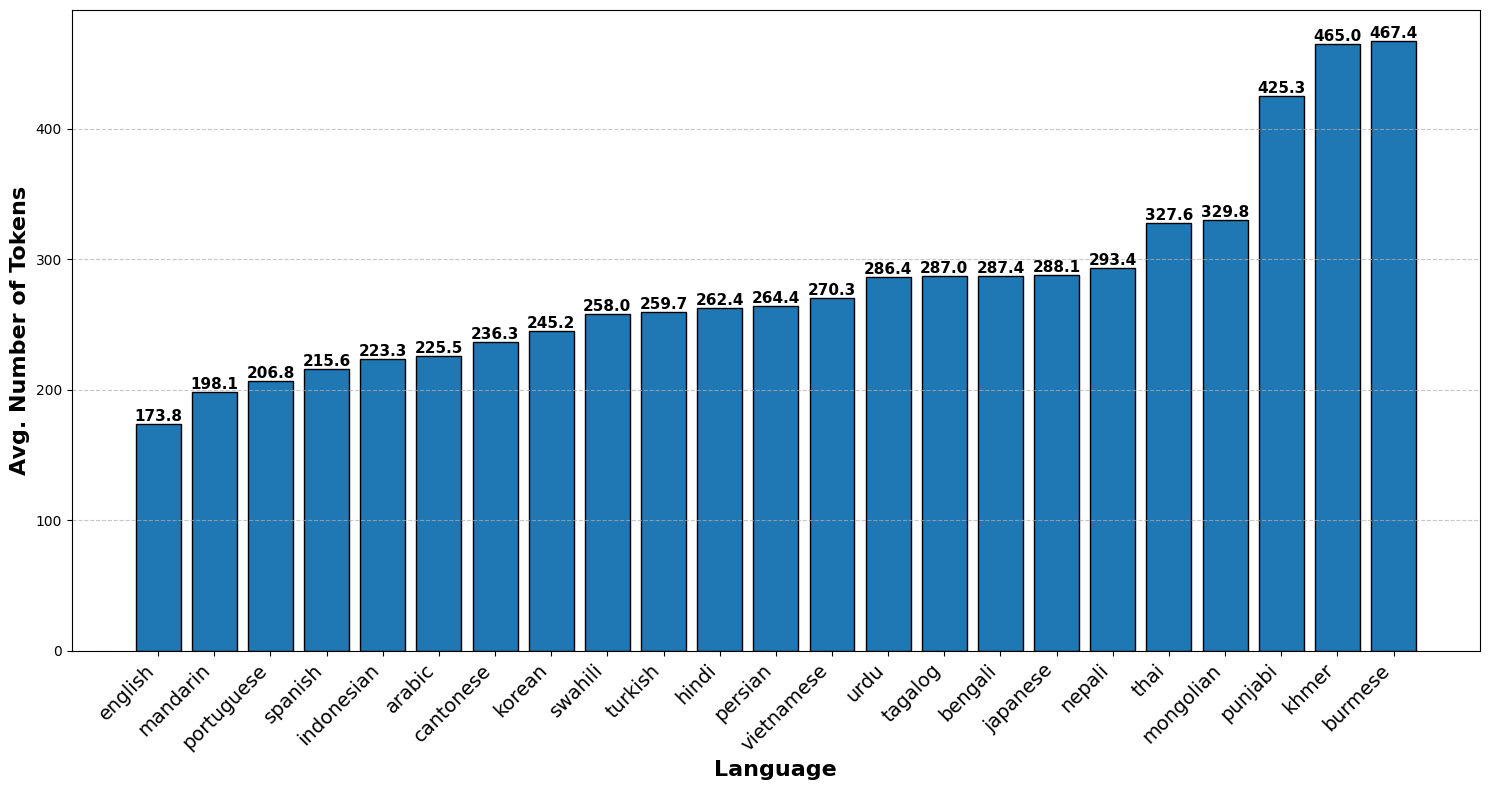

In [7]:
# Create dataframe from the data
df = tokens.mean().reset_index()
df.columns = ["Language", "Tokens"]

# df = pd.DataFrame(data)

# Sort by number of tokens
df = df.sort_values("Tokens")

# Create the plot
plt.figure(figsize=(15, 8))

# Create bars
bars = plt.bar(range(len(df)), df["Tokens"], edgecolor="black")

# Customize the plot
plt.xticks(range(len(df)), df["Language"], rotation=45, ha="right", fontsize=14)
plt.ylabel("Avg. Number of Tokens", fontsize=16, fontweight="bold")
plt.xlabel("Language", fontsize=16, fontweight="bold")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("../figs/language_tokens.png", dpi=300, bbox_inches="tight")
plt.show()

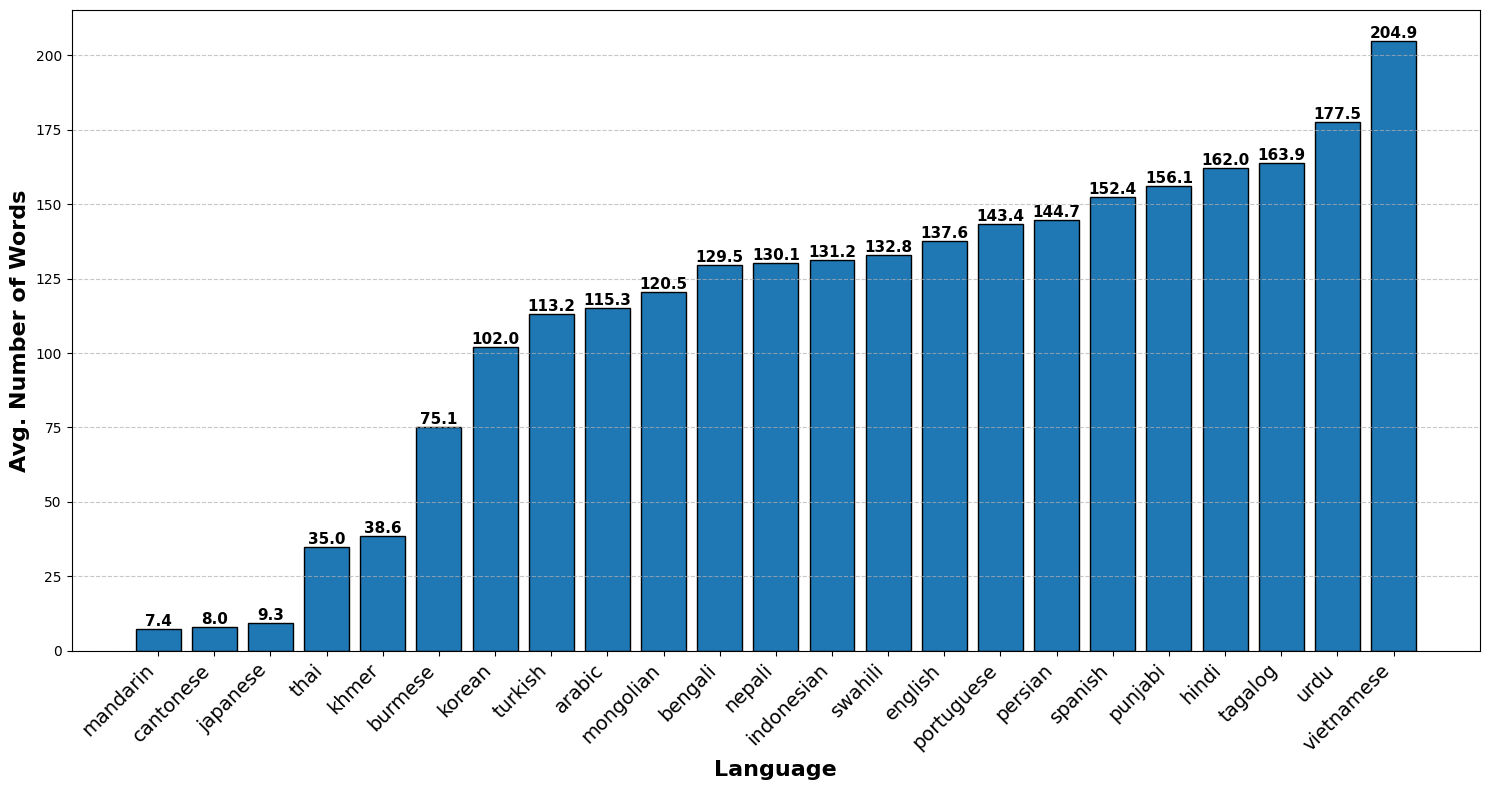

In [8]:
df = unigrams.mean().reset_index()
df.columns = ["Language", "Tokens"]

# Sort by number of tokens
df = df.sort_values("Tokens", ascending=True)

# Create the plot
plt.figure(figsize=(15, 8))

# Create bars
bars = plt.bar(range(len(df)), df["Tokens"], edgecolor="black")

# Customize the plot
plt.xticks(range(len(df)), df["Language"], rotation=45, ha="right", fontsize=14)
plt.ylabel("Avg. Number of Words", fontsize=16, fontweight="bold")
plt.xlabel("Language", fontsize=16, fontweight="bold")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("../figs/language_words.png", dpi=300, bbox_inches="tight")
plt.show()